# Battery spectroscopy report

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from load_data import load_spice_data, load_AD2_data, load_SDS_data

In [8]:
IMPEDANCE_DIRECTORY = "Impedance spectroscopy/"
try:
    with open("project_dir_path.txt") as file:
        PROJECT_DIRECTORY = file.readline()
except FileNotFoundError:
    print("""Don't forget to create file "project_dir_path.txt" with
          the path to the project directory.""")
DATA_DIRECTORY = PROJECT_DIRECTORY + IMPEDANCE_DIRECTORY

## ECM1

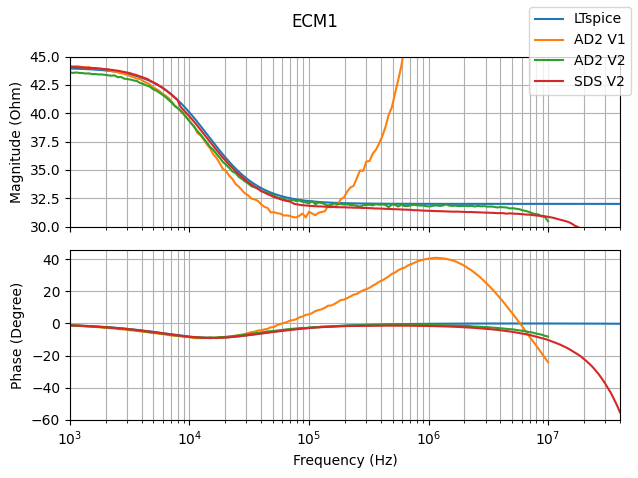

In [9]:
ECM1_SPICE_DATA_FILE = DATA_DIRECTORY + "ECM1/ECM1_SPICE_DATA.txt"
ECM1_1_AD2_DATA_FILE = DATA_DIRECTORY + "ECM1/ECM1V1_AD2_DATA.csv"
ECM1_2_AD2_DATA_FILE = DATA_DIRECTORY + "ECM1/ECM1V2_AD2_DATA.csv"
ECM1_2_SDS_DATA_FILE = DATA_DIRECTORY + "ECM1/ECM1V2_SDS_DATA.csv"

ECM1_SPICE_data = load_spice_data(ECM1_SPICE_DATA_FILE)
ECM1_1_AD2_data = load_AD2_data(ECM1_1_AD2_DATA_FILE)
ECM1_2_AD2_data = load_AD2_data(ECM1_2_AD2_DATA_FILE)
ECM1_2_SDS_data = load_SDS_data(ECM1_2_SDS_DATA_FILE)

ECM1_2_SDS_data[1] *= 1044  # post multiplication because of measurment setup
ECM1_SPICE_data[2] -= 180  # post correction phase LTspice

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle("ECM1")

ax1.plot(ECM1_SPICE_data[0], ECM1_SPICE_data[1])
ax1.plot(ECM1_1_AD2_data[0], ECM1_1_AD2_data[1])
ax1.plot(ECM1_2_AD2_data[0], ECM1_2_AD2_data[1])
ax1.plot(ECM1_2_SDS_data[0], ECM1_2_SDS_data[1])
ax1.set_ylabel("Magnitude (Ohm)")
ax1.set_ylim(30, 45)
ax1.grid(True, 'both')

ax2.plot(ECM1_SPICE_data[0], ECM1_SPICE_data[2])
ax2.plot(ECM1_1_AD2_data[0], ECM1_1_AD2_data[2])
ax2.plot(ECM1_2_AD2_data[0], ECM1_2_AD2_data[2])
ax2.plot(ECM1_2_SDS_data[0], ECM1_2_SDS_data[2])
ax2.set_ylabel("Phase (Degree)")
ax2.grid(True, 'both')

plt.xlabel("Frequency (Hz)")
plt.xscale("log")
plt.xlim(1e3, 40e6)
plt.figlegend(["LTspice", "AD2 V1", "AD2 V2", "SDS V2"])
fig.tight_layout()
plt.show()

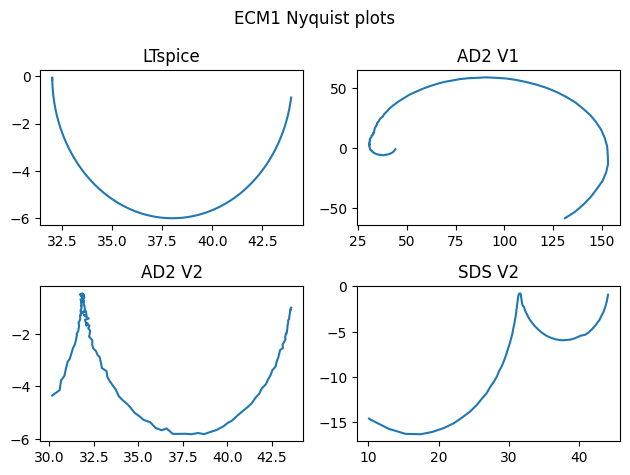

In [10]:
ECM1_SPICE_complex = np.array([mag * np.exp(1j * np.radians(phase))
                              for mag, phase in zip(ECM1_SPICE_data[1],
                                                    ECM1_SPICE_data[2])])
ECM1_1_AD2_complex = np.array([mag * np.exp(1j * np.radians(phase))
                            for mag, phase in zip(ECM1_1_AD2_data[1],
                                                  ECM1_1_AD2_data[2])])
ECM1_2_AD2_complex = np.array([mag * np.exp(1j * np.radians(phase))
                              for mag, phase in zip(ECM1_2_AD2_data[1],
                                                    ECM1_2_AD2_data[2])])
ECM1_2_SDS_complex = np.array([mag * np.exp(1j * np.radians(phase))
                              for mag, phase in zip(ECM1_2_SDS_data[1],
                                                    ECM1_2_SDS_data[2])])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("ECM1 Nyquist plots")
ax1.plot(ECM1_SPICE_complex.real, ECM1_SPICE_complex.imag)
ax1.set_title("LTspice")
ax2.plot(ECM1_1_AD2_complex.real, ECM1_1_AD2_complex.imag)
ax2.set_title("AD2 V1")
ax3.plot(ECM1_2_AD2_complex.real, ECM1_2_AD2_complex.imag)
ax3.set_title("AD2 V2")
ax4.plot(ECM1_2_SDS_complex.real, ECM1_2_SDS_complex.imag)
ax4.set_title("SDS V2")
fig.tight_layout()
plt.show()

## ECM2

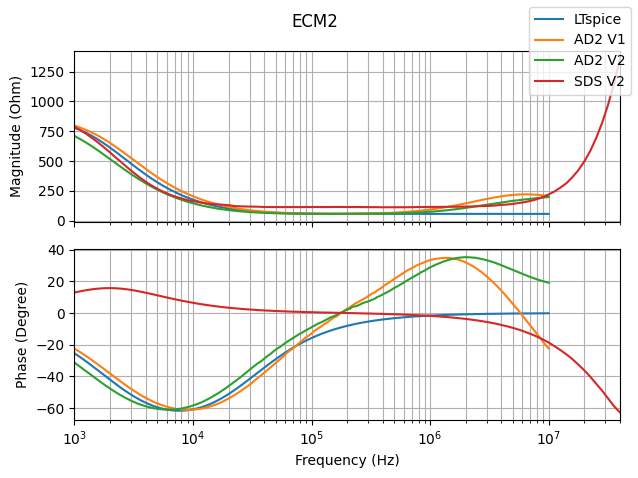

In [11]:
ECM2_SPICE_DATA_FILE = DATA_DIRECTORY + "ECM2/ECM2_SPICE_DATA.txt"
ECM2_1_AD2_DATA_FILE = DATA_DIRECTORY + "ECM2/ECM2V1_AD2_DATA.csv"
ECM2_2_AD2_DATA_FILE = DATA_DIRECTORY + "ECM2/ECM2V2_AD2_DATA.csv"
ECM2_2_SDS_DATA_FILE = DATA_DIRECTORY + "ECM2/ECM2V2_SDS_DATA.csv"

ECM2_SPICE_data = load_spice_data(ECM2_SPICE_DATA_FILE)
ECM2_1_AD2_data = load_AD2_data(ECM2_1_AD2_DATA_FILE)
ECM2_2_AD2_data = load_AD2_data(ECM2_2_AD2_DATA_FILE)
ECM2_2_SDS_data = load_SDS_data(ECM2_2_SDS_DATA_FILE)

# post multiplication because of measurment setup
ECM2_2_SDS_data[1] = (1 - ECM2_2_SDS_data[1]) * 1997

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle("ECM2")

ax1.plot(ECM2_SPICE_data[0], ECM2_SPICE_data[1])
ax1.plot(ECM2_1_AD2_data[0], ECM2_1_AD2_data[1])
ax1.plot(ECM2_2_AD2_data[0], ECM2_2_AD2_data[1])
ax1.plot(ECM2_2_SDS_data[0], ECM2_2_SDS_data[1])
ax1.set_ylabel("Magnitude (Ohm)")
ax1.grid(True, 'both')

ax2.plot(ECM2_SPICE_data[0], ECM2_SPICE_data[2])
ax2.plot(ECM2_1_AD2_data[0], ECM2_1_AD2_data[2])
ax2.plot(ECM2_2_AD2_data[0], ECM2_2_AD2_data[2])
ax2.plot(ECM2_2_SDS_data[0], ECM2_2_SDS_data[2])
ax2.set_ylabel("Phase (Degree)")
ax2.grid(True, 'both')

plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.xlim(1e3, 40e6)
plt.figlegend(["LTspice", "AD2 V1", "AD2 V2", "SDS V2"])
fig.tight_layout()
plt.show()

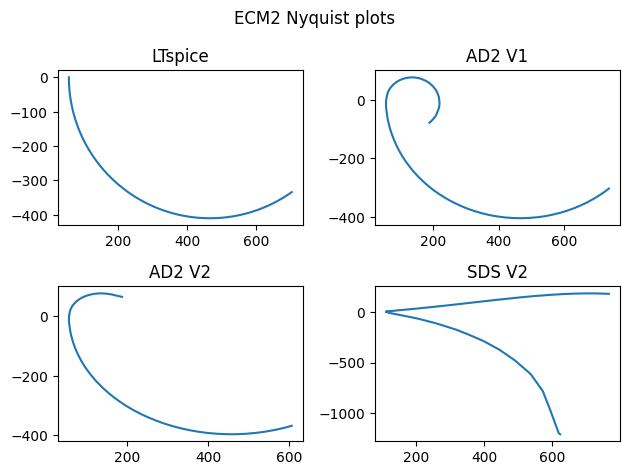

In [12]:
ECM2_SPICE_complex = np.array([mag * np.exp(1j * np.radians(phase))
                              for mag, phase in zip(ECM2_SPICE_data[1],
                                                    ECM2_SPICE_data[2])])
ECM2_1_AD2_complex = np.array([mag * np.exp(1j * np.radians(phase))
                            for mag, phase in zip(ECM2_1_AD2_data[1],
                                                  ECM2_1_AD2_data[2])])
ECM2_2_AD2_complex = np.array([mag * np.exp(1j * np.radians(phase))
                              for mag, phase in zip(ECM2_2_AD2_data[1],
                                                    ECM2_2_AD2_data[2])])
ECM2_2_SDS_complex = np.array([mag * np.exp(1j * np.radians(phase))
                              for mag, phase in zip(ECM2_2_SDS_data[1],
                                                    ECM2_2_SDS_data[2])])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("ECM2 Nyquist plots")
ax1.plot(ECM2_SPICE_complex.real, ECM2_SPICE_complex.imag)
ax1.set_title("LTspice")
ax2.plot(ECM2_1_AD2_complex.real, ECM2_1_AD2_complex.imag)
ax2.set_title("AD2 V1")
ax3.plot(ECM2_2_AD2_complex.real, ECM2_2_AD2_complex.imag)
ax3.set_title("AD2 V2")
ax4.plot(ECM2_2_SDS_complex.real, ECM2_2_SDS_complex.imag)
ax4.set_title("SDS V2")
fig.tight_layout()
plt.show()